In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [14]:
data  = pd.read_csv('green_tech_data.csv')

In [15]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [17]:
print(data.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


sustainability
0    85
1    15
Name: count, dtype: int64


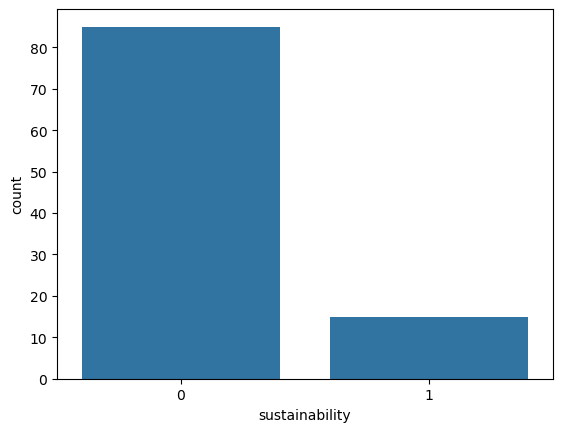

In [18]:
print(data['sustainability'].value_counts())
sns.countplot(x = 'sustainability', data = data)
plt.show()

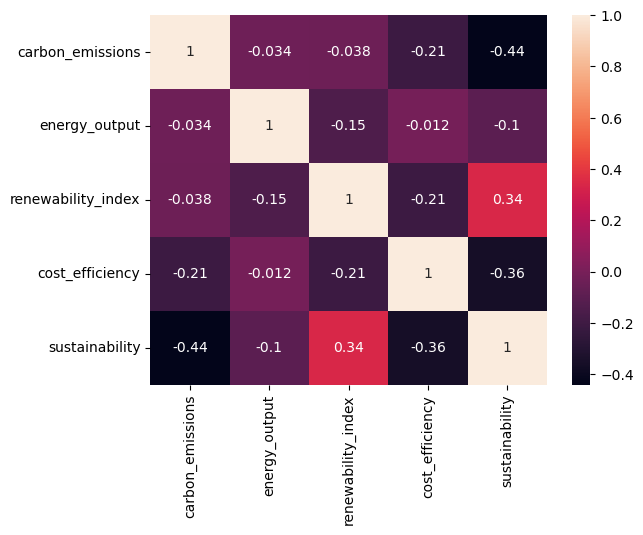

In [19]:
sns.heatmap(data = data.corr(), annot = True)
plt.show()

In [58]:
x = data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']

In [59]:
xtrain ,xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [61]:
xtrain.head()

,carbon_emissions,renewability_index,cost_efficiency
55,372.655982,0.556801,3.390887
88,360.524460,0.286541,3.877766
26,119.885824,0.973011,2.994593
42,62.035982,0.914864,1.279408
69,395.410428,0.293592,0.812126


In [62]:
model = LogisticRegression()

model.fit(xtrain, ytrain)

LogisticRegression()

In [63]:
print("Slope : ", model.coef_)
print("y_intercept :", model.intercept_)

Slope :  [[-0.02285875  1.09534323 -1.16461336]]
y_intercept : [4.25727603]


In [64]:
ypred = model.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.95


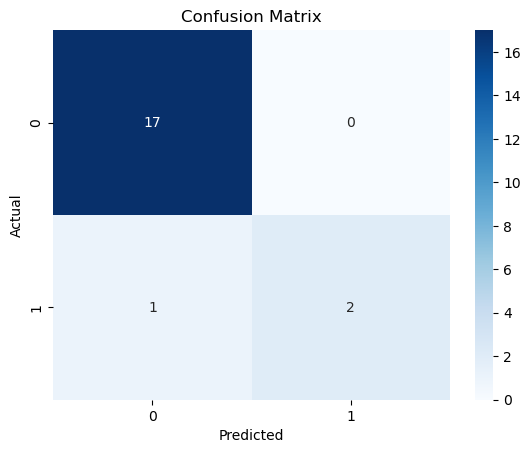

Confusion Matrix:
[[17  0]
 [ 1  2]]


In [65]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)

In [66]:
cr = classification_report(ytest, ypred)
print("Classification Report : ")
print(cr)

Classification Report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



In [67]:
coefficients = pd.DataFrame(model.coef_.T, index = x.columns, columns= ['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.022859
renewability_index     1.095343
cost_efficiency       -1.164613


In [68]:
import joblib
joblib.dump(model,'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

In [72]:
loaded_model = joblib.load('lrmodel_sustainable.pkl')

new_data = pd.DataFrame({
    'carbon_emissions': [0.5],
    'renewability_index': [0.8],
    'cost_efficiency': [0.7]
})

new_prediction = loaded_model.predict(new_data)

print(f"Prediction for new data is Sustainable : {new_prediction}")

Prediction for new data is Sustainable : [1]
